In [740]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [725]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [5]:
TRAIN_DATASET_PATH = 'C:/Users/User/train.csv'
TEST_DATASET_PATH = 'C:/Users/User/test.csv'

In [794]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)

In [795]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [796]:
#преобразовала int в str
train_df['DistrictId']=train_df['DistrictId'].astype(str)

In [797]:
train_df = train_df.drop('Id', axis =1 )

In [798]:
#убираем НаН из LifeSquare
condition1=train_df['LifeSquare'].isna()
train_df.loc[condition1,'LifeSquare']=train_df['LifeSquare'].median()

In [799]:
#сделать фичу из KitchenSquare 0 метров - нет кухни и есть кухня

train_df['have_kitchen']=1
train_df.loc[train_df['KitchenSquare']<1.5, 'have_kitchen'] = 0

In [800]:
#заменяем выборосы более 100 метров и менее 1метра на среднее
condition2=(train_df['KitchenSquare']>16)|(train_df['KitchenSquare']<1)
train_df.loc[condition2,'KitchenSquare']=train_df['KitchenSquare'].mean()

In [801]:
#убрала выбросы комнат меньше 1 и больше 5, заменила их на значение 2, так как mean было =1.890400
condition3=(train_df['Rooms']>5)|(train_df['Rooms']<1)
train_df.loc[condition3,'Rooms']=2

In [802]:
#заменяем выбросы более 2020 года на 2020
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [803]:
#заменяем 0 этаж на среднее HouseFloor и Floor

train_df.loc[train_df['Floor']==0, 'Floor']=train_df['Floor'].median()
train_df.loc[train_df['HouseFloor']==0, 'HouseFloor']=train_df['HouseFloor'].median()

In [804]:
#Floor - этаж не может быть больше HouseFloor
#HouseFloor - количество этажей в доме
#ззаменяю этаж квартиры если он больше количества этажей в доме на последний этаж

train_df.loc[train_df['Floor']>train_df['HouseFloor'], 'Floor'] = train_df.loc[train_df['Floor']>train_df['HouseFloor'], 'HouseFloor']


In [805]:
#привожу к int зелочисленные значения
train_df['Floor']=train_df['Floor'].astype(int)
train_df['HouseFloor']=train_df['HouseFloor'].astype(int)
train_df['Rooms']=train_df['Rooms'].astype(int)

In [806]:
#заменяем object на int
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

In [807]:
#удаляем колонку Healthcare_1 из за большого количества пропусков
train_df.drop('Healthcare_1', axis=1, inplace=True)

In [808]:
train_df.head(5)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,have_kitchen
0,27,3,115.027311,32.781260,10.0,4,10,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,1
1,22,1,39.832524,23.169223,8.0,7,8,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,1
2,1,3,78.342215,47.671972,10.0,2,17,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,1
3,1,1,40.409907,32.781260,1.0,10,22,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,0
4,94,2,64.285067,38.562517,9.0,16,16,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,1


In [809]:
ft_names=train_df.columns.tolist()
target_name = 'Price'
ft_names

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'have_kitchen']

In [810]:
X = train_df.drop(columns=target_name)
y = train_df[target_name]

# использую линейную регрессию для построения модели

In [811]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [812]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [813]:
lr.fit(X_train, y_train)

LinearRegression()

In [814]:
y_pred = lr.predict(X_valid)
y_pred_train = lr.predict(X_train)

Train R2:	0.49
Test R2:	0.506


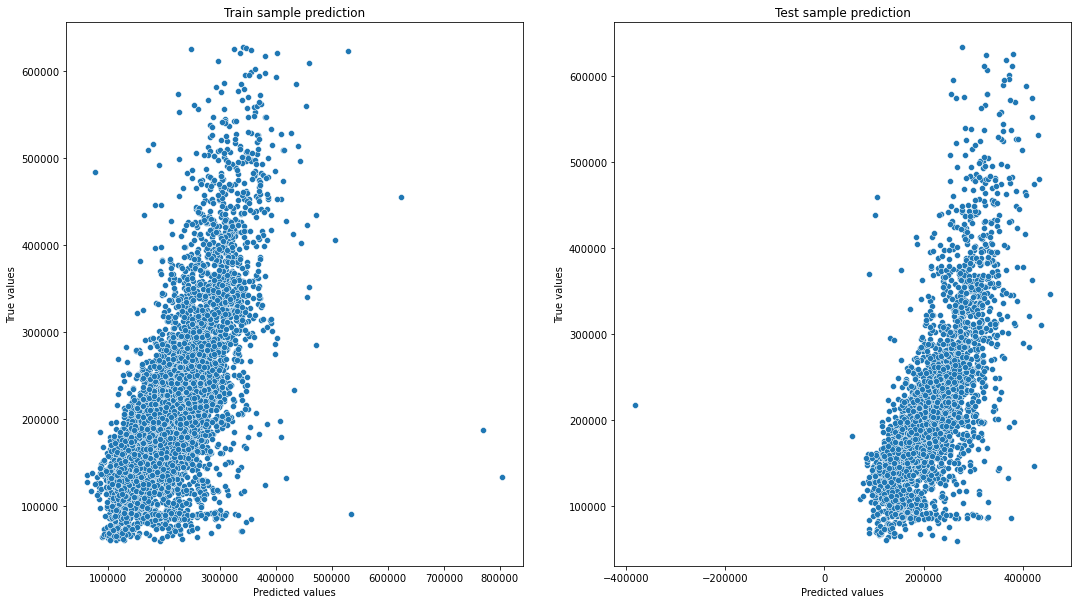

In [815]:

evaluate_preds(y_train, y_pred_train, y_valid, y_pred)

# использую RandomForest для построения модели

In [816]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

Train R2:	0.96
Test R2:	0.737


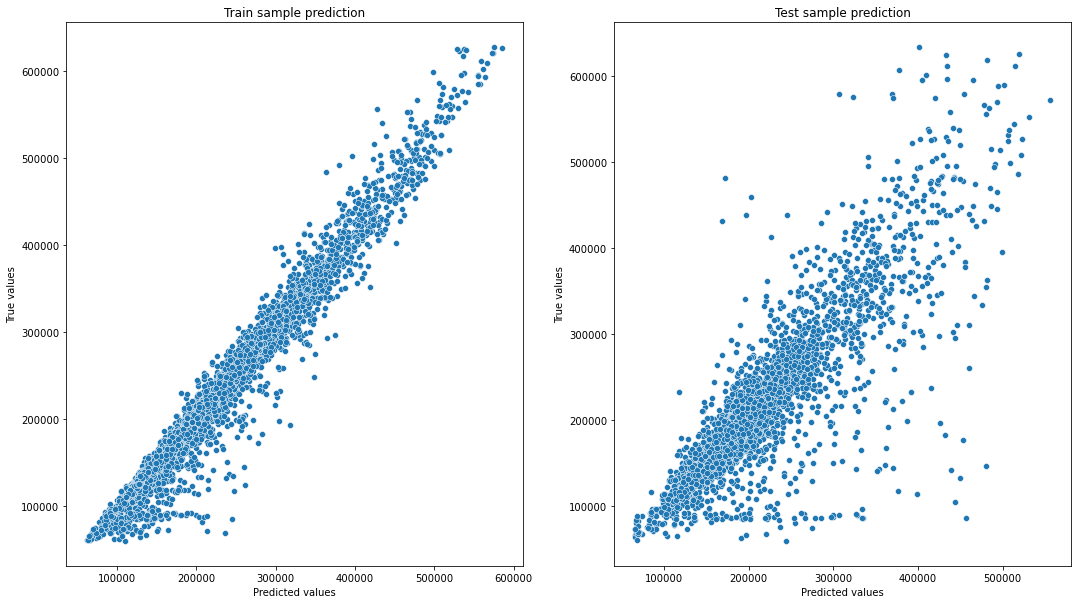

In [817]:
train_pred = forest.predict(X_train)
test_pred = forest.predict(X_valid)
evaluate_preds(y_train, train_pred, y_valid, test_pred)

# Обработка тестового ДФ

In [852]:
test_df = pd.read_csv(TEST_DATASET_PATH)

In [853]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [854]:
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [855]:
#удаляю колонки с не валидными значениями
test_df.drop('Healthcare_1', axis=1, inplace=True)
test_df.drop('Id', axis=1, inplace=True)
#привожу к int зелочисленные значения
test_df['Floor']=train_df['Floor'].astype(int)
test_df['HouseFloor']=train_df['HouseFloor'].astype(int)
test_df['Rooms']=train_df['Rooms'].astype(int)

In [856]:
#убираем НаН из LifeSquare
test_condition1=test_df['LifeSquare'].isna()
test_df.loc[test_condition1,'LifeSquare']=test_df['LifeSquare'].median()

In [857]:
#сделать фичу из KitchenSquare 0 метров - нет кухни и есть кухня

test_df['have_kitchen']=1
test_df.loc[test_df['KitchenSquare']<1.5, 'have_kitchen'] = 0

In [858]:
#заменяем выборосы более 100 метров и менее 1метра на среднее
test_condition2=(test_df['KitchenSquare']>16)|(test_df['KitchenSquare']<1)
test_df.loc[test_condition2,'KitchenSquare']=test_df['KitchenSquare'].mean()

In [859]:
#убрала выбросы комнат меньше 1 и больше 5, заменила их на значение 2, так как mean было =1.890400
condition3=(test_df['Rooms']>5)|(test_df['Rooms']<1)
test_df.loc[condition3,'Rooms']=2

In [860]:
#ззаменяю этаж квартиры если он больше количества этажей в доме на последний этаж

test_df.loc[test_df['Floor']>test_df['HouseFloor'], 'Floor'] = test_df.loc[test_df['Floor']>test_df['HouseFloor'], 'HouseFloor']


In [861]:
#заменяем object на int
binary_to_numbers = {'A': 0, 'B': 1}

test_df['Ecology_2'] = test_df['Ecology_2'].replace(binary_to_numbers)
test_df['Ecology_3'] = test_df['Ecology_3'].replace(binary_to_numbers)
test_df['Shops_2'] = test_df['Shops_2'].replace(binary_to_numbers)

In [863]:
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,have_kitchen
0,44,3,36.847630,19.094182,5.0,4,10,1970,0.036122,1,1,24,4378,0,1,1,1,1
1,62,1,42.493907,42.568133,10.0,7,8,2017,0.072158,1,1,2,629,1,0,0,0,1
2,27,3,59.463678,32.925087,9.0,2,17,1977,0.211401,1,1,9,1892,0,0,1,1,1
3,23,1,49.646030,33.893825,6.0,10,22,1965,0.014073,1,1,2,475,0,0,0,1,1
4,74,2,53.837056,32.925087,1.0,16,16,1977,0.309479,1,1,35,7715,4,0,6,1,0


передаем данные в модель для построения предсказания

In [864]:
forest.fit(X, y)

RandomForestRegressor()

In [870]:
final_pred=pd.DataFrame(forest.predict(test_df), columns=['Price'])

In [883]:
final_pred1=pd.read_csv(TEST_DATASET_PATH)
final_pred1['Price']=final_pred

In [917]:
final_pred.to_csv('Donskova_predict.csv', index=False)